<a href="https://colab.research.google.com/github/Anujsharmagithubbb/Task2_Prodigy-infotech/blob/main/task2_prodigy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install required packages
!pip install --upgrade diffusers transformers accelerate safetensors
!pip install torch torchvision --index-url https://download.pytorch.org/whl/cu118  # for GPU runtime

# Hugging Face login (optional: needed for some models like SD 2.1)
from huggingface_hub import notebook_login
notebook_login()  # Enter your Hugging Face token when prompted


Looking in indexes: https://download.pytorch.org/whl/cu118


In [ ]:
import torch
from diffusers import StableDiffusionPipeline

# Choose model:
# "runwayml/stable-diffusion-v1-5"  (lighter, good for most prompts)
# "stabilityai/stable-diffusion-2-1" (higher-res, needs more VRAM)
model_id = "runwayml/stable-diffusion-v1-5"

device = "cuda" if torch.cuda.is_available() else "cpu"

pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16 if device=="cuda" else torch.float32,
    safety_checker=None  # disable for simplicity; you can keep it enabled
)
pipe = pipe.to(device)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


In [ ]:
prompt = "A cozy futuristic treehouse with warm golden lighting, ultra-detailed, 8k"
negative_prompt = "lowres, blurry, deformed, text, watermark"

# Generate
image = pipe(
    prompt,
    negative_prompt=negative_prompt,
    guidance_scale=7.5,
    num_inference_steps=30,
    height=512,
    width=512,
    generator=torch.manual_seed(42)  # reproducibility
).images[0]

# Show and save
image.show()
image.save("stable_diffusion_output.png")


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

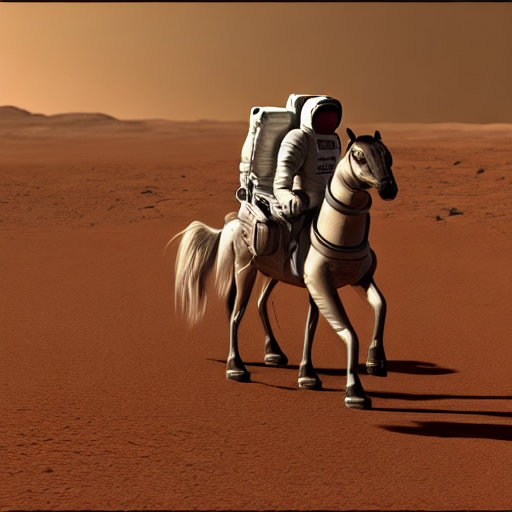

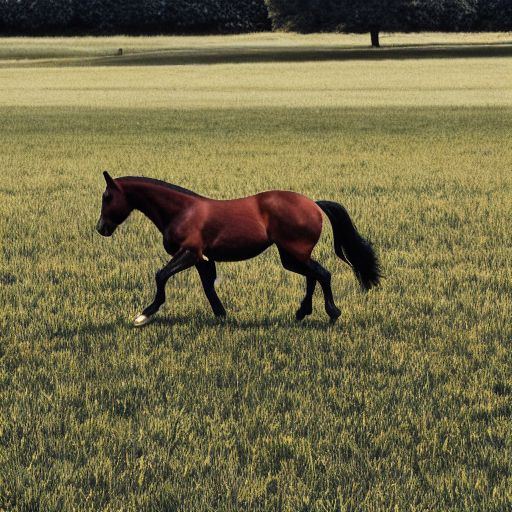

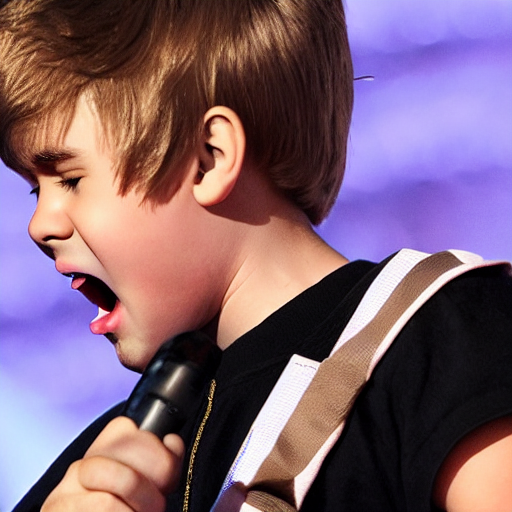

In [ ]:
prompts = [
    "An astronaut riding a horse on Mars, cinematic, photorealistic",
    "horse running in a grass field",
    "justin beiber singing"
]

images = pipe(prompts, guidance_scale=8.5, num_inference_steps=35).images

for i, img in enumerate(images):
    img.save(f"output_{i}.png")
    display(img)


In [ ]:
from google.colab import files
files.download("stable_diffusion_output.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>